In [1]:
library(haven)
options(scipen = 5)

In [2]:
# Dataset on labor supply in Kenya in 2020 during Covid
kenya<-read_dta("kenya_labor_covid.dta")
head(kenya)

id,individual,wave,age,gender,ishead,marital,childcare_hr,employed,ag_hrs,⋯,s2_q9a_county,working_l7,workinghrs_l7,current_num_adults,month,post,hhent,hhag,ag_hh,ent_hh
<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>
1878,3,1,40,1,0,NA,NA,0,0,⋯,16,0,0,6,725,0,0,0,0,0
705,1,1,42,1,0,1,84,0,0,⋯,1,0,0,4,725,0,0,0,0,0
4338,1,1,30,1,1,3,35,1,0,⋯,32,1,45,6,724,0,0,0,0,0
4847,4,1,19,0,0,NA,NA,0,2,⋯,15,1,2,4,725,0,0,1,1,0
1600,1,1,59,1,1,8,NA,0,6,⋯,46,1,6,3,725,0,0,1,1,0
2710,2,1,38,1,0,NA,NA,0,0,⋯,41,0,0,2,725,0,0,0,0,1


In [3]:
reg1<- lm(employed~ age + gender + ishead + marital +
          current_num_adults+current_num_5_17 +current_num_0_4, data = kenya)
summary(reg1)


Call:
lm(formula = employed ~ age + gender + ishead + marital + current_num_adults + 
    current_num_5_17 + current_num_0_4, data = kenya)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22386 -0.14944 -0.09639 -0.04857  1.09615 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.2187575  0.0134786  16.230  < 2e-16 ***
age                -0.0011141  0.0002734  -4.075 4.63e-05 ***
gender             -0.0595661  0.0063145  -9.433  < 2e-16 ***
ishead              0.0492732  0.0072448   6.801 1.08e-11 ***
marital            -0.0029067  0.0008985  -3.235  0.00122 ** 
current_num_adults -0.0189835  0.0022918  -8.283  < 2e-16 ***
current_num_5_17   -0.0058214  0.0018085  -3.219  0.00129 ** 
current_num_0_4     0.0028351  0.0036712   0.772  0.43997    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3106 on 12906 degrees of freedom
  (18837 observations deleted due to missingness)
Mult

In [4]:
# How to interpret the intercept?
# How to interpret the coefficient on gender (dummy where female=1)?

In [5]:
# Predicted value for 30 year old woman with some characteristics
predempl = c(1,30,1,0,1,4,5,0) %*% summary(reg1)$coef[,1]
as.numeric(round(predempl,3))
# And for a 60 year old
predempl2 = c(1,60,1,0,1,4,5,0) %*% summary(reg1)$coef[,1]
as.numeric(round(predempl2,3))

[1] 0.018

[1] -0.016

In [6]:
# Any issue here?
# Not specific to this particular model
# Back to lecture

In [7]:
# Logit model with binary dep var
reg2<- glm(employed~ gender, data = kenya, family = "binomial")
summary(reg2)


Call:
glm(formula = employed ~ gender, family = "binomial", data = kenya)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4733  -0.4733  -0.3119  -0.3119   2.4688  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.13272    0.02637  -80.86   <2e-16 ***
gender      -0.86605    0.04505  -19.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16985  on 31750  degrees of freedom
Residual deviance: 16591  on 31749  degrees of freedom
AIC: 16595

Number of Fisher Scoring iterations: 5


In [8]:
# How to interpret the coefficient for gender?
mean(kenya[kenya$gender==1,]$employed)
mean(kenya[kenya$gender==0,]$employed)
orf=mean(kenya[kenya$gender==1,]$employed)/(1-mean(kenya[kenya$gender==1,]$employed))
orm=mean(kenya[kenya$gender==0,]$employed)/(1-mean(kenya[kenya$gender==0,]$employed))
orf/orm
log(orf/orm)

[1] 0.04748115

[1] 0.1059568

[1] 0.4206079

[1] -0.8660543

In [9]:
# Converting log odds
logodds=round(summary(reg2)$coef[2,1],3) # log odds
oddsratio=round(exp(logodds),3) # odds
logodds
oddsratio

[1] -0.866

[1] 0.421

In [10]:
# Logit model with continuous dep var
reg3<- glm(employed~ gender+age, data = kenya, family = "binomial")
summary(reg3)


Call:
glm(formula = employed ~ gender + age, family = "binomial", data = kenya)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5779  -0.4517  -0.3454  -0.2939   2.5665  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.667256   0.066367 -40.190   <2e-16 ***
gender      -0.858921   0.045106 -19.042   <2e-16 ***
age          0.015034   0.001667   9.019   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16985  on 31750  degrees of freedom
Residual deviance: 16511  on 31748  degrees of freedom
AIC: 16517

Number of Fisher Scoring iterations: 5


In [11]:
# How to interpret coefficient on age?
round(exp(summary(reg3)$coef[3,1]),3)
# Back to lecture

[1] 1.015

In [12]:
# Proxy variables
# Load data on monthly wages
wagedata2<-read_dta("WAGE2.DTA")
head(wagedata2)

wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
769,40,93,35,12,11,2,31,1,0,0,1,1,2,8,8,6.645091
808,50,119,41,18,11,16,37,1,0,0,1,1,NA,14,14,6.694562
825,40,108,46,14,11,9,33,1,0,0,1,1,2,14,14,6.715384
650,40,96,32,12,13,7,32,1,0,0,1,4,3,12,12,6.476973
562,40,74,27,11,14,5,34,1,0,0,1,10,6,6,11,6.331502
1400,40,116,43,16,14,2,35,1,1,0,1,1,2,8,NA,7.244227


In [13]:
# Suppose unobserved ability=delta_0 + \delta_1 IQ + v
wagedata2$ability=-10+0.1*wagedata2$IQ+runif(nrow(wagedata2))
summary(wagedata2$ability)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.2767 -0.3659  0.7164  0.6267  1.7271  5.3282 

In [14]:
#biased model
reg4<-lm(lwage ~ educ + exper, data = wagedata2)
summary(reg4)
#true model
reg5<-lm(lwage ~ educ + exper + ability, data = wagedata2)
summary(reg5)


Call:
lm(formula = lwage ~ educ + exper, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86915 -0.24001  0.03564  0.26132  1.30061 

Coefficients:
            Estimate Std. Error t value      Pr(>|t|)    
(Intercept) 5.502710   0.112037  49.115       < 2e-16 ***
educ        0.077782   0.006577  11.827       < 2e-16 ***
exper       0.019777   0.003303   5.988 0.00000000302 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.393 on 932 degrees of freedom
Multiple R-squared:  0.1309,	Adjusted R-squared:  0.129 
F-statistic: 70.16 on 2 and 932 DF,  p-value: < 2.2e-16



Call:
lm(formula = lwage ~ educ + exper + ability, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94180 -0.21957  0.02028  0.25767  1.28603 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.738978   0.117429  48.872  < 2e-16 ***
educ        0.057857   0.007322   7.902 7.73e-15 ***
exper       0.019553   0.003246   6.023 2.46e-09 ***
ability     0.055333   0.009546   5.796 9.27e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3863 on 931 degrees of freedom
Multiple R-squared:  0.1611,	Adjusted R-squared:  0.1584 
F-statistic: 59.61 on 3 and 931 DF,  p-value: < 2.2e-16


In [15]:
# How is the coefficient on educ biased? 
# What does that imply about the relationship between educ and ability?

In [16]:
# Regression with proxy variable
reg6<- lm(lwage ~ educ + exper + IQ, data = wagedata2)
summary(reg6)


Call:
lm(formula = lwage ~ educ + exper + IQ, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93902 -0.21414  0.02295  0.26270  1.25771 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.1980851  0.1215426  42.768  < 2e-16 ***
educ        0.0571080  0.0073480   7.772 2.04e-14 ***
exper       0.0195249  0.0032444   6.018 2.53e-09 ***
IQ          0.0057856  0.0009797   5.906 4.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3861 on 931 degrees of freedom
Multiple R-squared:  0.1622,	Adjusted R-squared:  0.1595 
F-statistic:  60.1 on 3 and 931 DF,  p-value: < 2.2e-16


In [17]:
# What if IQ had been less of a good proxy?
# Suppose unobserved ability=delta_0 + \delta_1 IQ + \delta_2 educ + v_2
wagedata2$ability2=-11+0.1*wagedata2$IQ+0.1*wagedata2$educ+ runif(nrow(wagedata2))
summary(wagedata2$ability2)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.20976 -0.08822  1.06600  0.98351  2.09138  5.85958 

In [18]:
# True model
reg7<- lm(lwage ~ educ + exper + ability2, data = wagedata2)
summary(reg7)
# Regression with proxy variable
summary(reg6)


Call:
lm(formula = lwage ~ educ + exper + ability2, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92984 -0.22120  0.01756  0.25675  1.27646 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.789899   0.120853  47.909  < 2e-16 ***
educ        0.052537   0.007805   6.731 2.94e-11 ***
exper       0.019616   0.003247   6.042 2.20e-09 ***
ability2    0.055604   0.009631   5.774 1.06e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3864 on 931 degrees of freedom
Multiple R-squared:  0.1609,	Adjusted R-squared:  0.1582 
F-statistic: 59.51 on 3 and 931 DF,  p-value: < 2.2e-16



Call:
lm(formula = lwage ~ educ + exper + IQ, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93902 -0.21414  0.02295  0.26270  1.25771 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.1980851  0.1215426  42.768  < 2e-16 ***
educ        0.0571080  0.0073480   7.772 2.04e-14 ***
exper       0.0195249  0.0032444   6.018 2.53e-09 ***
IQ          0.0057856  0.0009797   5.906 4.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3861 on 931 degrees of freedom
Multiple R-squared:  0.1622,	Adjusted R-squared:  0.1595 
F-statistic:  60.1 on 3 and 931 DF,  p-value: < 2.2e-16


In [19]:
# Including the proxy helps, but not as much

In [20]:
# What if IQ is a pretty bad proxy?
wagedata2$ability3=-8+0.01*wagedata2$IQ+0.25*wagedata2$educ+ runif(nrow(wagedata2))*7
summary(wagedata2$ability3)
# True model
reg9<- lm(lwage ~ educ + exper + ability3, data = wagedata2)
summary(reg9)
# Regression with proxy variable
summary(reg6)
# Original biased regression
summary(reg4)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.74554 -1.86332 -0.01685 -0.09780  1.62335  4.36436 


Call:
lm(formula = lwage ~ educ + exper + ability3, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84110 -0.24558  0.02749  0.26467  1.27195 

Coefficients:
            Estimate Std. Error t value      Pr(>|t|)    
(Intercept) 5.550932   0.115974  47.864       < 2e-16 ***
educ        0.074448   0.006897  10.794       < 2e-16 ***
exper       0.019576   0.003302   5.928 0.00000000431 ***
ability3    0.010141   0.006373   1.591         0.112    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3927 on 931 degrees of freedom
Multiple R-squared:  0.1332,	Adjusted R-squared:  0.1304 
F-statistic:  47.7 on 3 and 931 DF,  p-value: < 2.2e-16



Call:
lm(formula = lwage ~ educ + exper + IQ, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93902 -0.21414  0.02295  0.26270  1.25771 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.1980851  0.1215426  42.768  < 2e-16 ***
educ        0.0571080  0.0073480   7.772 2.04e-14 ***
exper       0.0195249  0.0032444   6.018 2.53e-09 ***
IQ          0.0057856  0.0009797   5.906 4.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3861 on 931 degrees of freedom
Multiple R-squared:  0.1622,	Adjusted R-squared:  0.1595 
F-statistic:  60.1 on 3 and 931 DF,  p-value: < 2.2e-16



Call:
lm(formula = lwage ~ educ + exper, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86915 -0.24001  0.03564  0.26132  1.30061 

Coefficients:
            Estimate Std. Error t value      Pr(>|t|)    
(Intercept) 5.502710   0.112037  49.115       < 2e-16 ***
educ        0.077782   0.006577  11.827       < 2e-16 ***
exper       0.019777   0.003303   5.988 0.00000000302 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.393 on 932 degrees of freedom
Multiple R-squared:  0.1309,	Adjusted R-squared:  0.129 
F-statistic: 70.16 on 2 and 932 DF,  p-value: < 2.2e-16


In [21]:
# We actually increase our bias with this bad proxy
# Back to lecture

In [22]:
# Measurement error in the dependent variable
# True model
reg10<- lm(wage ~ age+ educ + exper, data = wagedata2)
summary(reg10)


Call:
lm(formula = wage ~ age + educ + exper, data = wagedata2)

Residuals:
    Min      1Q  Median      3Q     Max 
-879.71 -250.74  -42.82  193.49 2211.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -559.621    152.095  -3.679 0.000247 ***
age           12.552      4.730   2.654 0.008091 ** 
educ          71.434      6.530  10.940  < 2e-16 ***
exper         12.127      3.774   3.213 0.001358 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.1 on 931 degrees of freedom
Multiple R-squared:  0.1423,	Adjusted R-squared:  0.1396 
F-statistic:  51.5 on 3 and 931 DF,  p-value: < 2.2e-16


In [23]:
# Monthly wage distribution
summary(wagedata2$wage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  115.0   669.0   905.0   957.9  1160.0  3078.0 

In [24]:
# Suppose we measure wages with classical random error of -250 to +500
wagedata2$wage2=wagedata2$wage+runif(nrow(wagedata2),-250,500)
summary(wagedata2$wage2)
# Estimates with classical error in wage
reg11<- lm(wage2 ~age+  educ + exper , data = wagedata2)
summary(reg11)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  106.0   766.8  1028.6  1091.4  1343.9  3558.1 


Call:
lm(formula = wage2 ~ age + educ + exper, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1046.23  -284.50   -43.05   244.46  2382.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -398.899    173.920  -2.294   0.0220 *  
age           15.932      5.408   2.946   0.0033 ** 
educ          65.046      7.467   8.711   <2e-16 ***
exper          7.544      4.316   1.748   0.0808 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 428.9 on 931 degrees of freedom
Multiple R-squared:  0.1032,	Adjusted R-squared:  0.1003 
F-statistic: 35.72 on 3 and 931 DF,  p-value: < 2.2e-16


In [25]:
# Let's run some simulations with classical measurement error
library(ggplot2)

In [26]:
estimates <- data.frame(matrix(NA,    # Create empty data frame
                          nrow = 1000,
                          ncol = 1)) 
estimates$coef<-0
estimates$tstat<-0
set.seed(1000)
for(i in 1:1000) {
    wagedata2$error=runif(nrow(wagedata2), -250,500)
    wagedata2$wage2=wagedata2$wage+wagedata2$error
    rege<-lm(wage2 ~age+  educ + exper , data = wagedata2)
    estimates[i,'coef']<-summary(rege)$coefficients[3,1] 
    estimates[i,'tstat']<-summary(rege)$coefficients[3,3] 
}

[1] 71.30908

[1] 71.43399

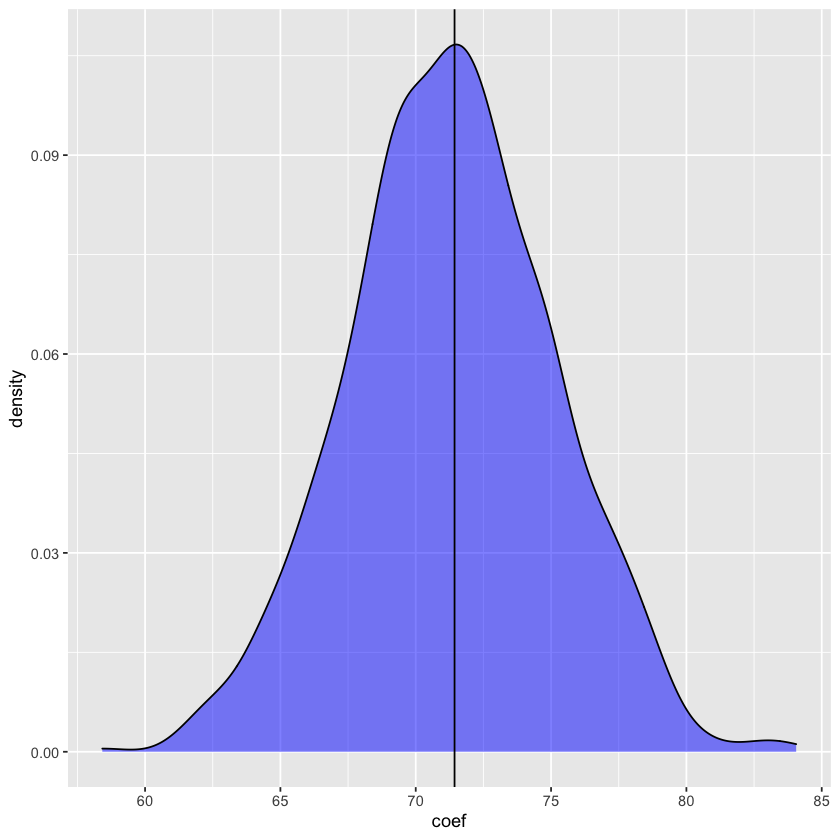

In [27]:
# Distribution of beta_2 relative to truth
truth<-summary(reg10)$coefficients[3,1]
p <- ggplot(estimates, aes(x=coef)) + 
    geom_density(fill = "blue", alpha = .5) +
    geom_vline( xintercept = truth)
p
mean(estimates$coef)
truth

[1] 9.466239

[1] 10.93961

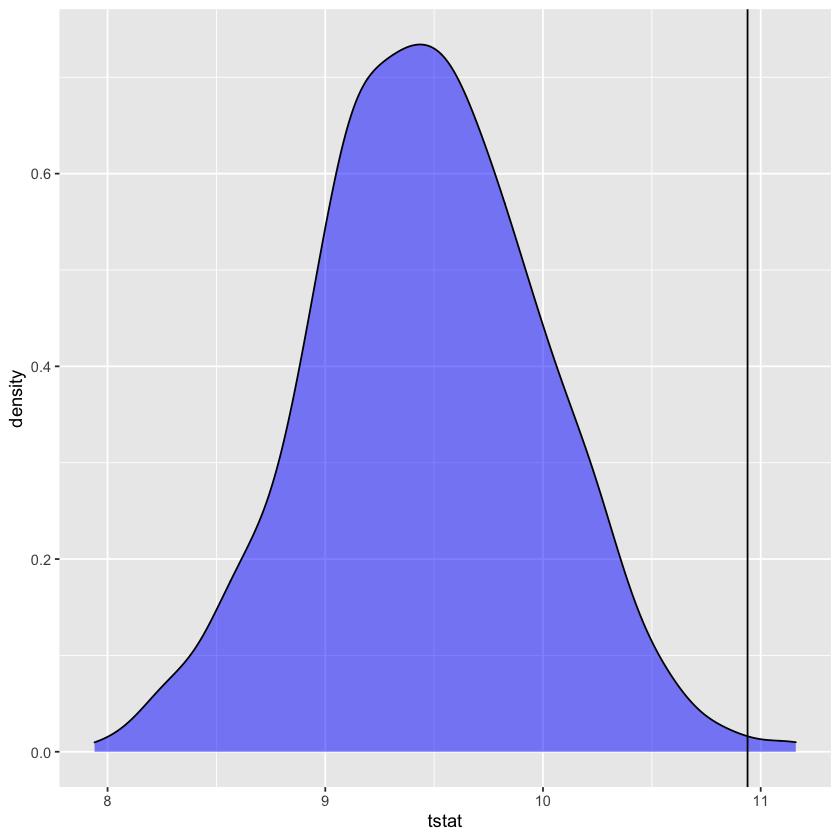

In [28]:
# Distribution of t for beta_2 relative to truth
truth<-summary(reg10)$coefficients[3,3]
p <- ggplot(estimates, aes(x=tstat)) + 
    geom_density(fill = "blue", alpha = .5) +
    geom_vline( xintercept = truth)
p
mean(estimates$tstat)
truth

In [29]:
# Suppose we measure wages with non-classical error, correlated with educ
wagedata2$wage3=wagedata2$wage+runif(nrow(wagedata2),-500,500)/wagedata2$educ*4
summary(wagedata2$wage3)
reg12<- lm(wage3 ~age+  educ + exper , data = wagedata2)
summary(reg12)
summary(reg10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.91  665.68  902.20  954.00 1158.51 3087.31 


Call:
lm(formula = wage3 ~ age + educ + exper, data = wagedata2)

Residuals:
    Min      1Q  Median      3Q     Max 
-978.24 -262.52  -37.44  208.75 2224.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -576.984    156.958  -3.676  0.00025 ***
age           12.398      4.881   2.540  0.01124 *  
educ          72.700      6.739  10.789  < 2e-16 ***
exper         12.255      3.895   3.146  0.00171 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 387.1 on 931 degrees of freedom
Multiple R-squared:  0.1382,	Adjusted R-squared:  0.1355 
F-statistic: 49.78 on 3 and 931 DF,  p-value: < 2.2e-16



Call:
lm(formula = wage ~ age + educ + exper, data = wagedata2)

Residuals:
    Min      1Q  Median      3Q     Max 
-879.71 -250.74  -42.82  193.49 2211.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -559.621    152.095  -3.679 0.000247 ***
age           12.552      4.730   2.654 0.008091 ** 
educ          71.434      6.530  10.940  < 2e-16 ***
exper         12.127      3.774   3.213 0.001358 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.1 on 931 degrees of freedom
Multiple R-squared:  0.1423,	Adjusted R-squared:  0.1396 
F-statistic:  51.5 on 3 and 931 DF,  p-value: < 2.2e-16


In [30]:
# Suppose we measure wages with non-classical error, correlated with age
wagedata2$wage3=wagedata2$wage+runif(nrow(wagedata2),-100,100)*wagedata2$age/2
summary(wagedata2$wage3)
reg13<- lm(wage3 ~age+  educ + exper , data = wagedata2)
summary(reg13)
summary(reg10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1488.8   153.6   942.8   968.7  1760.8  4298.4 


Call:
lm(formula = wage3 ~ age + educ + exper, data = wagedata2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2424.98  -823.23   -26.26   786.92  3083.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -99.129    419.128  -0.237  0.81309   
age            8.001     13.033   0.614  0.53943   
educ          56.752     17.994   3.154  0.00166 **
exper          3.350     10.401   0.322  0.74748   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1034 on 931 degrees of freedom
Multiple R-squared:  0.01389,	Adjusted R-squared:  0.01071 
F-statistic:  4.37 on 3 and 931 DF,  p-value: 0.004583



Call:
lm(formula = wage ~ age + educ + exper, data = wagedata2)

Residuals:
    Min      1Q  Median      3Q     Max 
-879.71 -250.74  -42.82  193.49 2211.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -559.621    152.095  -3.679 0.000247 ***
age           12.552      4.730   2.654 0.008091 ** 
educ          71.434      6.530  10.940  < 2e-16 ***
exper         12.127      3.774   3.213 0.001358 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.1 on 931 degrees of freedom
Multiple R-squared:  0.1423,	Adjusted R-squared:  0.1396 
F-statistic:  51.5 on 3 and 931 DF,  p-value: < 2.2e-16
